# **Week 4 Assignment: Centrality Measures**

---



**Submitted by:** Umais Siddiqui,Banu Boopalan, Euclides

**Date:** February 17, 2025

**Course:** Data Science – DATA620

**Video Link:** https://youtu.be/CfxCLx2jEgQ



# **Wikipedia API and Data Source**
Wikipedia is one of the largest and most comprehensive sources of publicly available information. The Wikipedia API provides a powerful interface to programmatically access and analyze Wikipedia content, including page links, categories, and metadata. By leveraging the Wikipedia API, researchers can extract valuable insights into the structure of knowledge and information dissemination across different domains.

The data for this analysis is sourced from Wikipedia pages using the Wikipedia API. This API allows users to fetch content, extract hyperlinks, and analyze relationships between various topics. The extracted data is then processed and structured for network analysis to identify patterns in interconnectivity and information flow.

# **Categorical Data Constraint:**

---



In our study, we aim to analyze Wikipedia articles using network analysis by constructing a graph where articles and categories are nodes, and the relationships between them are represented by edges. Each node will be associated with at least one categorical variable, such as the article's main title (e.g., "Machine learning," "Technology," "Artificial Intelligence"). We are going to pull back associated links within the links column there are unique values associated on each link. We want to extract the topic within the link pages and be able to categorize these links by type (e.g, person of interest, paper types like journal, article , authors etc. ) . Within the topics what are the key themes. By applying centrality measures like degree, betweenness, and closeness, we can identify the most influential or central topics and categories in the particular title network within Wikipidia. This analysis will help us explore how knowledge is interconnected across different areas.

See code and data for the articles and categories below that gives us some basic insight in to the data we will be working with.

In [1]:
%%capture
!pip install wikipedia-api networkx matplotlib pandas;
import wikipediaapi;
import pandas as pd;
import networkx as nx;
import matplotlib.pyplot as plt;
import concurrent.futures;
import warnings;
from IPython.display import display;
from collections import Counter;
import seaborn as sns;


# Suppress warnings
warnings.simplefilter("ignore")
base_url = "https://en.wikipedia.org/wiki/"  # Wikipedia base URL
# List of Wikipedia pages to analyze
page_titles = ["Machine learning", "Artificial intelligence", "Data science", "Deep learning", "Neural network"]

# Initialize Wikipedia API
wiki_wiki = wikipediaapi.Wikipedia(user_agent="DataScienceProject/1.0 (umais20@yahoo.com)", language='en')
# Dictionaries to count occurrences
category_counts = Counter()
link_counts = Counter()

# Extract data from each page
data = []
all_links = []  # List to accumulate links from all pages
first_page_attributes = {}
page={}
for idx, title in enumerate(page_titles):
    page = wiki_wiki.page(title)
    #page_content = page.text
    # Extract categories (removing "Category:" prefix)
    categories = [cat.replace("Category:", "") for cat in page.categories.keys()]
    category_counts.update(categories)

    # Extract internal Wikipedia links
    links = list(page.links.keys())
    all_links.extend([base_url + link.replace(" ", "_") for link in page.links.keys()])

    # Show the first 10 links

    link_counts.update(links)

    # Store in DataFrame format
    data.append({
        "Title": title,
        "Categories": ", ".join(categories),
       # "links": ", ".join(links),
       # "Page Text": page_content
        "Category Count": len(categories),
        "Links Count": len(links)
    })

# Create a DataFrame for articles
df = pd.DataFrame(data)




In [4]:
print(page.text)

# Display DataFrame
links_df = pd.DataFrame(all_links, columns=["Wikipedia Links"])


print(links_df.head())
pd.set_option("display.max_colwidth", None)
display(df.head())



A neural network is a group of interconnected units called neurons that send signals to one another. Neurons can be either biological cells or mathematical models. While individual neurons are simple, many of them together in a network can perform complex tasks. There are two main types of neural network.

In neuroscience, a biological neural network is a physical structure found in brains and complex nervous systems – a population of nerve cells connected by synapses.
In machine learning, an artificial neural network is a mathematical model used to approximate nonlinear functions. Artificial neural networks are used to solve artificial intelligence problems.

In biology
In the context of biology, a neural network is a population of biological neurons chemically connected to each other by synapses. A given neuron can be connected to hundreds of thousands of synapses.
Each neuron sends and receives electrochemical signals called action potentials to its connected neighbors. A neuron can

,Title,Categories,Category Count,Links Count
0,Machine learning,"Articles with excerpts, Articles with short description, Commons category link from Wikidata, Cybernetics, Definition, Learning, Machine learning, Short description is different from Wikidata, Webarchive template wayback links, Wikipedia articles needing clarification from January 2024",10,901
1,Artificial intelligence,"All accuracy disputes, All articles with unsourced statements, Articles with Internet Encyclopedia of Philosophy links, Articles with disputed statements from July 2024, Articles with excerpts, Articles with short description, Articles with unsourced statements from June 2024, Artificial intelligence, CS1: long volume value, CS1 German-language sources (de), CS1 Japanese-language sources (ja), Computational fields of study, Computational neuroscience, Cybernetics, Data science, Formal sciences, Intelligence by type, Pages displaying short descriptions of redirect targets via Module:Annotated link, Pages using Sister project links with hidden wikidata, Short description is different from Wikidata, Use dmy dates from July 2023, Webarchive template wayback links, Wikipedia indefinitely semi-protected pages",23,1783
2,Data science,"Articles with short description, Computational fields of study, Computer occupations, Data analysis, Data science, Information science, Short description is different from Wikidata, Use dmy dates from August 2023",8,152
3,Deep learning,"All articles with unsourced statements, Articles prone to spam from June 2015, Articles with short description, Articles with unsourced statements from August 2024, Articles with unsourced statements from July 2016, Articles with unsourced statements from November 2020, CS1: long volume value, CS1 Finnish-language sources (fi), CS1 maint: multiple names: authors list, CS1 maint: postscript, Deep learning, Pages using multiple image with auto scaled images, Short description matches Wikidata, Webarchive template wayback links",14,569
4,Neural network,"Articles with short description, Broad-concept articles, Neural networks, Short description matches Wikidata",4,58


# **Project Plan: Analyzing Centrality Measures and Relationships in Wikipedia Articles**

---



**1. Introduction Objective:** To analyze the relationships between article titles and internal links of selected Wikipedia articles and the topic within those links and categorizing the link types, focusing on centrality measures and visualizing these relationships through graph representation.
Significance: Understanding the structure and connections of knowledge in Wikipedia can provide insights into how topics are interrelated and which categories or links are most influential

**2. Data Collection** Identify a set of Wikipedia articles relevant to the study (e.g., "Machine learning," "Artificial intelligence," etc.).
Data Sources:
Use the Wikipedia API (wikipediaapi library) to extract:
Categories associated with each article.
Internal links present in each article.

**3. Data Preparation**

**Organize Data:**
Create dictionaries to map articles to their titles and links.
Structure data to facilitate graph construction.

**4. Graph Construction**

Graph Representation:
Utilize the NetworkX library to create a directed graph where:
title  are nodes.
Edges represent the relationships (links/topics within those links within the article based on the title).
Node Types:Analysis on the link value and the categories of those links and links topics.

**5. Centrality Analysis**

**Centrality Measures:**
Calculate various centrality measures using NetworkX:

Degree Centrality: Identify nodes with the highest number of direct connections.

Betweenness Centrality: Determine nodes that act as bridges in the network.

Closeness Centrality: Assess nodes that are close to many others in the network.
Data Representation: Store centrality measures in a DataFrame for easy analysis and comparison.

**6. Visualization**

**Graph Visualization:** Use Matplotlib with NetworkX to visualize the constructed graph.Ensure nodes are labeled and styled for clarity.

**Highlight Centrality:** Consider using different node sizes or colors to represent varying levels of centrality.

**7. Analysis of Results**

**Identify Key Nodes:**Analyze which articles and categories have the highest centrality measures and discuss their significance.

**Community Detection:** Explore clustering algorithms to identify communities within the graph.

**Discussion:** Interpret the findings in the context of knowledge organization in Wikipedia.

**8. Conclusion**

**Summary:** Summarize the findings and their implications for understanding information structure in Wikipedia.

**Future Work:** Suggest potential extensions of the project, such as analyzing additional articles or integrating more complex graph metrics.

**9. References**

Include relevant literature on centrality measures, network analysis, and Wikipedia studies.

# **Basic Visualization of the Data:**

---



The provided code snippet analyzes and visualizes the most common categories and internal links from a set of Wikipedia articles. It begins by using the Counter object to identify the top 10 most frequent links and categories, which provide insight into the prevalent themes and connections within the articles. These counts are then converted into DataFrames for easier manipulation and visualization.

Using the Seaborn library, the code sets a clean aesthetic theme for the visualizations. It defines a function to annotate the bar plots with frequency counts, enhancing interpretability. Finally, two bar plots are generated: one displaying the top 10 most common Wikipedia categories and another for the most common internal links. These visualizations not only highlight the relationships among topics but also facilitate further analysis of how knowledge is organized within the Wikipedia network.

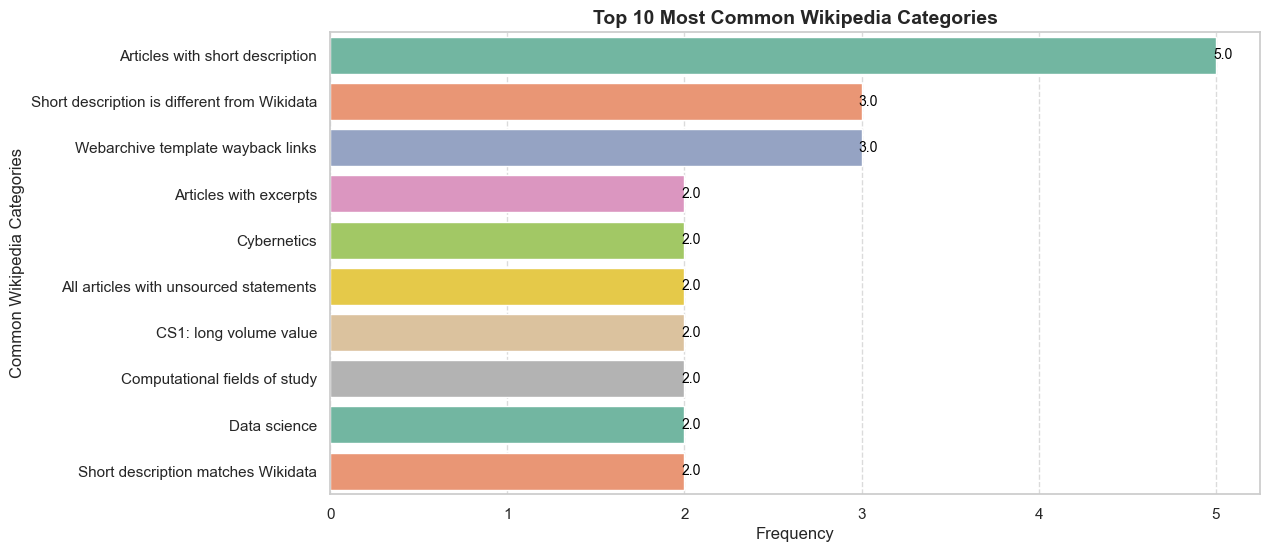

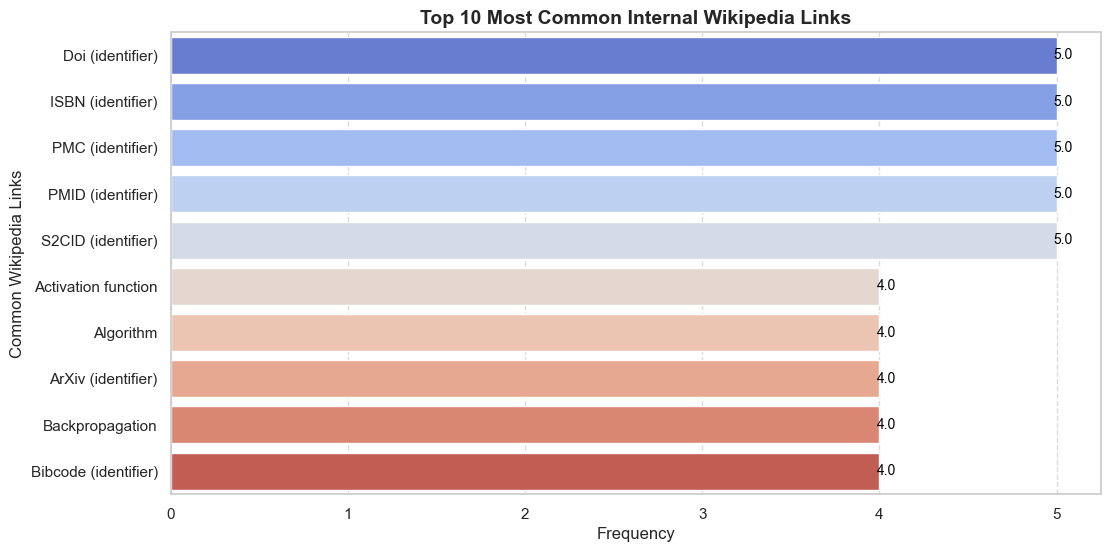

In [3]:

# Find the most common links & categories
common_links = link_counts.most_common(10)
common_categories = category_counts.most_common(10)

# Convert to DataFrames for visualization
link_df = pd.DataFrame(common_links, columns=["Link", "Count"])
category_df = pd.DataFrame(common_categories, columns=["Category", "Count"])

# Set Seaborn theme for better aesthetics
sns.set_theme(style="whitegrid")

# Function to add count labels on bars
def add_value_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_width()}',
                    (p.get_width(), p.get_y() + p.get_height() / 2),
                    ha='center', va='center',
                    fontsize=10, color='black',
                    xytext=(5, 0),
                    textcoords='offset points')

# Plot common categories
plt.figure(figsize=(12, 6))
ax_categories = sns.barplot(y="Category", x="Count", data=category_df, palette="Set2")
add_value_labels(ax_categories)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Common Wikipedia Categories", fontsize=12)
plt.title("Top 10 Most Common Wikipedia Categories", fontsize=14, fontweight="bold")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

# Plot common links
plt.figure(figsize=(12, 6))
ax_links = sns.barplot(y="Link", x="Count", data=link_df, palette="coolwarm")
add_value_labels(ax_links)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Common Wikipedia Links", fontsize=12)
plt.title("Top 10 Most Common Internal Wikipedia Links", fontsize=14, fontweight="bold")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


# **Conclusion :**

---



We can further perform a graph construction using the common links and categories, which will allow us to conduct a deeper analysis of the relationships between articles and their associated topics. By visualizing these connections, we can gain insights into the structure of knowledge in Wikipedia and identify central themes and influential nodes within the network. This deeper analysis can enhance our understanding of how information is interconnected and help us explore potential trends or patterns in the data.